In [6]:
import scipy
from scipy.optimize.minpack import curve_fit
import numpy 
import matplotlib.pyplot

In [7]:
#define the fit
def model_func2(x, a, c):
    return a*(numpy.exp(((-2*x)/0.26618876802713126) - (c*(2*x)**3)))

def fit_hahn(x, y):
    opt_parms, parm_cov = scipy.optimize.minpack.curve_fit(model_func2, x, y, p0=(200,270215422))
    A, C = opt_parms
    perr = [numpy.sqrt(numpy.diag(parm_cov))]
    return A, C, perr 


In [8]:
Gposition = 30.969221948574123 #copy this in from a separate calculation

In [9]:
#read in the data
data2=numpy.loadtxt(fname='pos9a.csv', delimiter=',')
X2= (data2[:,0])
Y02 = (data2[:,1])

[array([2.16288792e+00, 1.12095615e+07])]
The diffusion coefficient is 2.089125323661435e-09


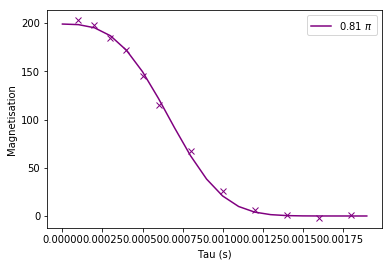

In [11]:
A2, C2, perr2= fit_hahn(X2,Y02)
print (perr2)
x = numpy.arange(0,0.002,0.0001)
fit_y2 = model_func2(x, A2, C2)

gamma=41.065e6

D02 = (C2*12)/((Gposition**2)*(gamma)**2)
print ('The diffusion coefficient is', D02)

matplotlib.pyplot.plot(X2, Y02, linewidth=1.5, color='purple', linestyle = '', marker='x', markeredgecolor='purple', markerfacecolor='white', label='')
matplotlib.pyplot.plot(x, fit_y2, linewidth=1.5, color='purple', linestyle = '-', marker='', markeredgecolor='purple', markerfacecolor='white', label='0.81 $\pi$')

matplotlib.pyplot.xlabel('Tau (s)')
matplotlib.pyplot.ylabel('Magnetisation')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()